<a href="https://colab.research.google.com/github/KARINAgoncalvesSOARES/Machine_Learning/blob/main/machinelearning_maquinas_de_vetores_de_suporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align="center"> Machine Learning: Support Vector Machines

Data Scientist Jr.: Karina Gonçalves Soares

Link de estudo:

* [Machine Learning: Support Vector Machines](https://github.com/EddyGiusepe/Machine_Learning/blob/main/4_ML_Support_Vector_Machines.ipynb)

#Máquina de Vetores de Suporte (Support Vector Machine: SVM)

É um algoritmo de aprendizado de máquina supervisionado que pode ser usado para desafios de classificação ou regressão. No entanto, é usado principalmente em problemas de classificação.

Essencialmente, o algoritmo de SVM é responsável por encontrar a melhor fronteira de separação entre classes/rótulos possível para um dado conjunto de dados que sejam linearmente separáveis. Para o SVM, as diversas fronteiras de separação possíveis que são capazes de separar completamente as classes são chamadas de hiperplanos. Dessa forma, o SVM busca encontrar o melhor hiperplano para um dado dataset cujas classes são linearmente separáveis. Podemos visualizar essa ideia através do cenário base de classificação (binária).

Em um dataset bidimensional, o hiperplano é uma reta. Em um dataset tridimensional, o hiperplano é de fato um plano. E assim sucessivamente

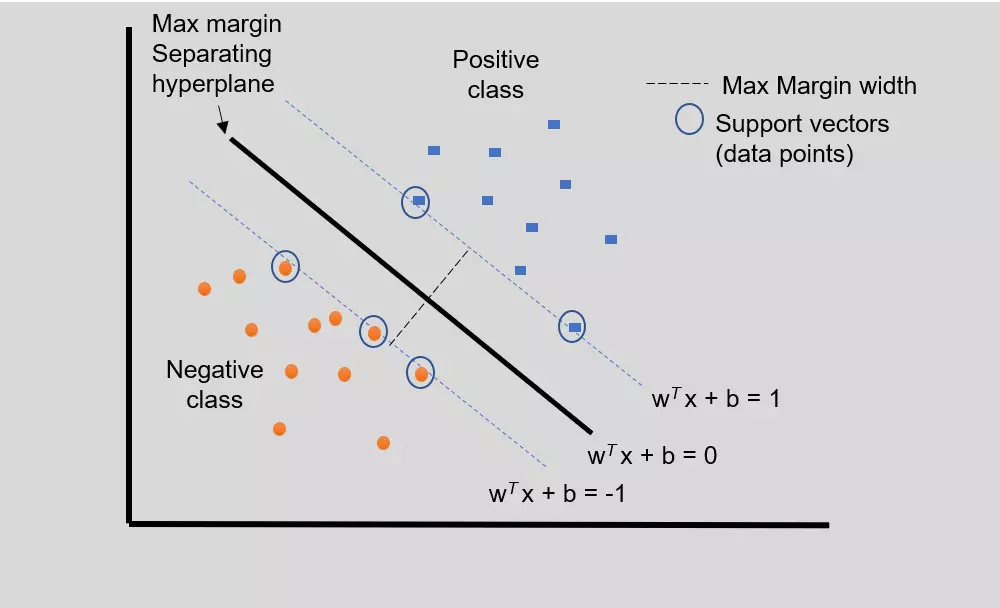

#Classificação Linear com SVM

Enquanto os modelos de Regressão Linear se baseiam na ideia de MINIMIZAR o número de erros, o algoritmo SVM tenta MAXIMIZAR a distância entre as fronteiras de decisão e os Dados de treinamento: A margem.

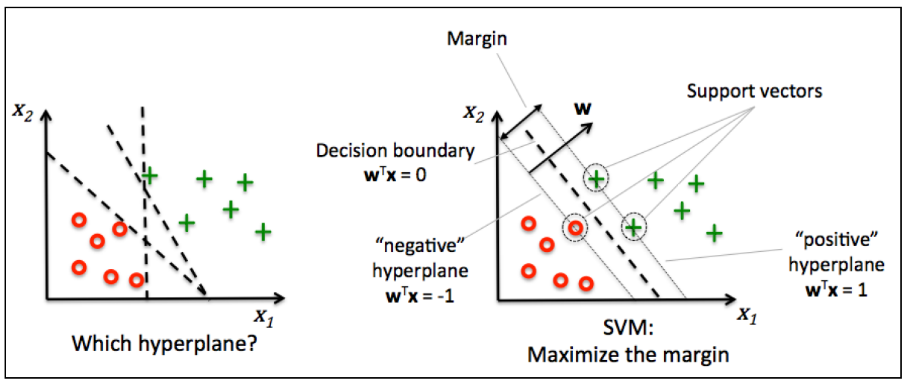

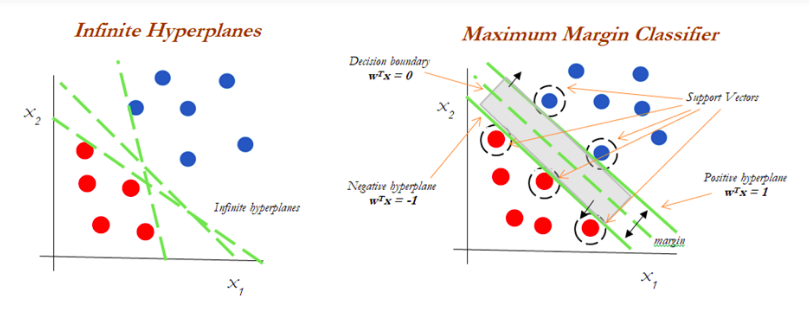

Adicionar mais Dados fora da Margem não afeta o modelo já que está totalmente determinado pelas instâncias localizadas nos limites da Fronteira: OS VETORES DE SUPORTE. Isto só funciona se os Dados são linearmente separáveis, em caso contrário devemos aceitar um certo número de erros (na seção seguinte veremos como fazer isso com um modelo linear).

Em scikit-learn podemos usar o modelo LinearSVC para treinar um classificador linear com SVM. A seguir veremos um exemplo de como ajustar o número de erros aceitáveis na classificação (instâncias dentro da Margem) com o Dataset Iris (já usados em outros scripts).

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings(action='ignore')

# Carregamos o Dataset (usamos dois features e apenas uma classe)
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica, apenas uma Target

print("shape de X: ", X.shape)
print("shape de y: ", y.shape)
print("")

# Normalizar nossos Datos (usando a Média e Desvio padrão)
scaler = StandardScaler()

# SVMs (dois diferentes valores de C). C=1 é por Default. C é um parâmetro de Regularização
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

# Treinar os seguintes dois modelos
scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])

scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

# Aqui treinamos os Modelos
print(scaled_svm_clf1.fit(X, y))
print("")
print(scaled_svm_clf2.fit(X, y))

shape de X:  (150, 2)
shape de y:  (150,)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])


## Algumas LOSS

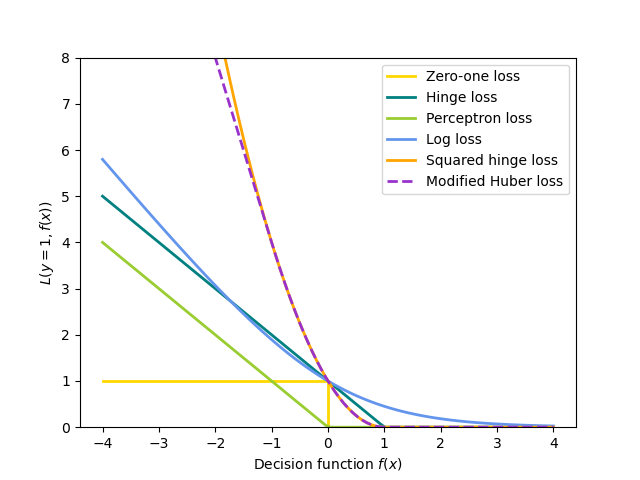

In [7]:
# Extrair as fronteiras de decisão (não normalizadas)
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_

svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Calcular vetores de suporte
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

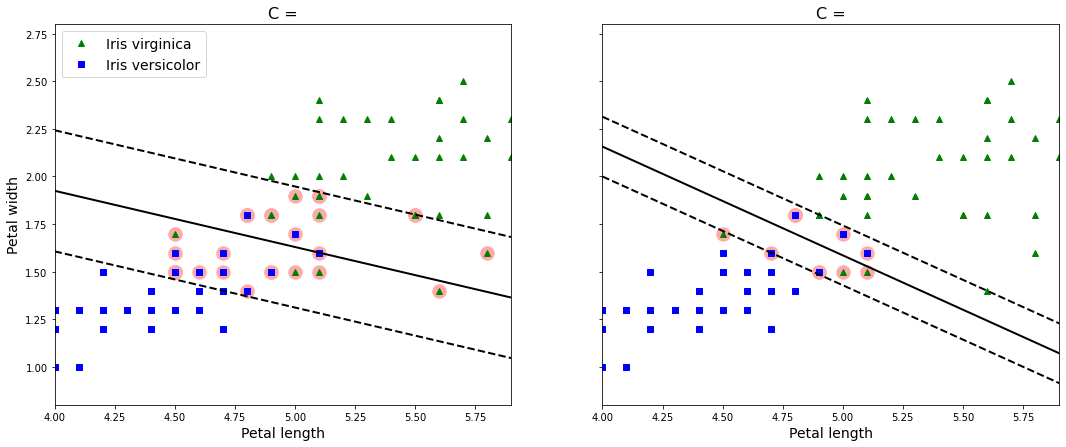

In [8]:
# Visualizar fronteiras de Decisão
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(18,7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("C =".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("C =".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.show()

Para saber se uma instância  X pertence a uma clase ou outra, podemos calcular a fronteira de decisão
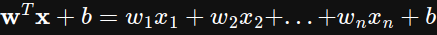
, onde w são os parâmetros do modelo, e b é o bias. Logo, podemos atribuir a clase em função de:

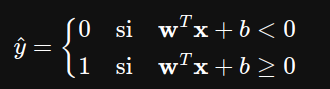

Treinar um algoritmo de SVM linear consiste em achar os valores de w e b que maximizem a margem e que ao mesmo tempo minimizem o número de erros. Assumindo que não queremos nenhum erro, precisamos que a fronteira de decisão seja maior que 1 para todas as amostras da classe positiva e menor que -1 para as amostras negativas. Isto pode expressar-se como  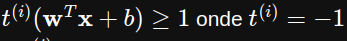  para as amostras negativas e 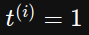 para as amostras positivas. Para permitir erros, se pode adicionar a slack variable e o hyperparâmetro C para ajustar o número de erros admissíveis. O problema se formaliza da maneria seguinte:

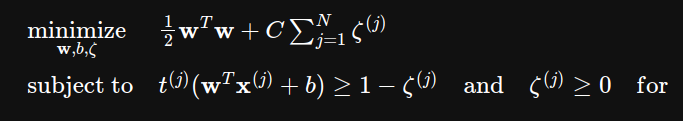

O qual tem a forma do problema de otimização quadrática com restrições lineares, cuja solução pode achar-se através de programação quadrática (Quadratic Programming* - QP). Ainda assim, o algoritmo SVM cumpre as condições para resolver o problema na forma dual (dual form*), o qual permite achar soluções mais rápidas e também permite o uso do kernel trick* (que veremos mais para frente).

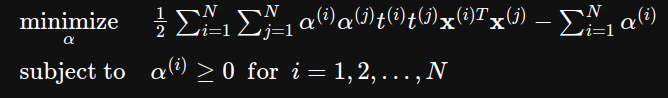

onde o vetor image.png minimiza a equação (usando um solver QP) e os parâmetros do SVM podem calcular-se como:

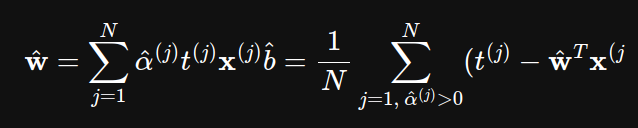

As equações acima foram uma breve demonstração das equações envolvidas no SVM. Para nossa sorte nós usaremos a biblioteca scikit-learn onde está tudo implementado.

#Classificação não-linear com SVM

Uma das vantagens principais, também, dos algoritmos SVMs com respeito aos modelos lineares é que são capazes de representar NÃO-LINEARIDADES. Para isso, os Dados são projetados a uma nova representação de maior dimensão na qual a fronteira de decisão pode expresar-se como um hyperplano, o qual maximiza a distância entre ele mesmo e os pontos mais pertos de cada classe (os Vetores de suporte).

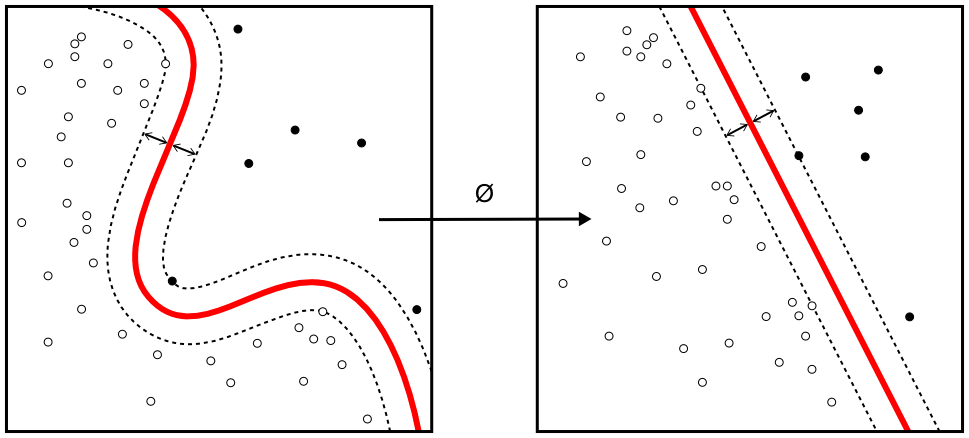

Sendo mais explícito:

Para separar esses tipos de exemplos (as figuras acima), o algoritmo primeiro faz uma transformação não-linear do espaço para depois poder separar os grupos com um SVM linear. Dessa forma, apesar da separação ser um hiperplano no espaço das features (como chamamos o espaço depois da transformação), no espaço das entradas (como chamamos o espaço inicial) a separação é não-linear.

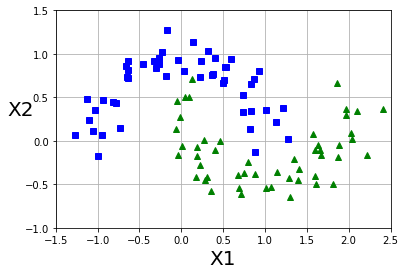

In [9]:
from sklearn.datasets import make_moons

# Criamos nosso Dataset. Criamos um Dataset com uma distribuição de Lua (Make moons)
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)


def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"X1", fontsize=20)
    plt.ylabel(r"X2", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Usamos um polinômio de grau 3.
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

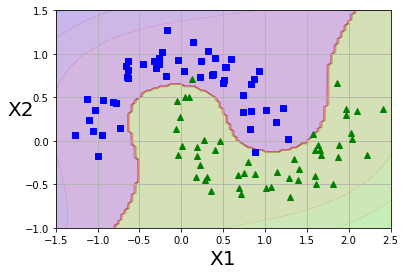

In [11]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)

    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

Os algoritmos de SVMs permitem incluir esta projeção diretamente no modelo. Esta técnica de projeção se conhece como o kernel trick. Para isso usamos o modelo SVC.

In [12]:
from sklearn.svm import SVC # Super Vector Classifier


# kernel="poly", degree=3 --> Isso já está incluso no Modelo, tal como se vê a continuação
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)
     

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [13]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

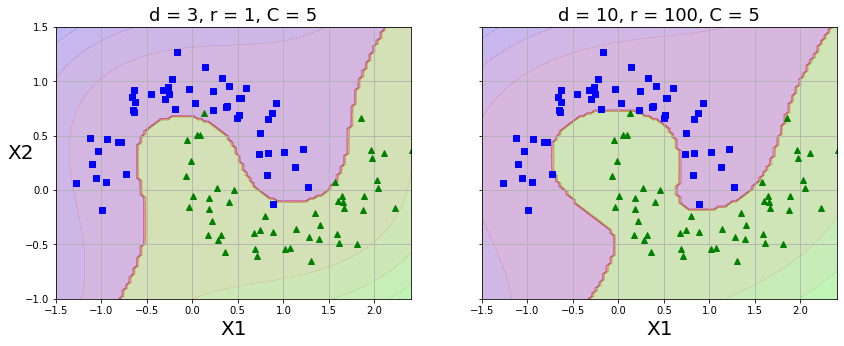

In [14]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"d = 3, r = 1, C = 5", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"d = 10, r = 100, C = 5", fontsize=18)
plt.ylabel("")

plt.show()

# Obs: Quanto maior o grau (degree) pode acontecer um overfitting
     

No entanto, o kernel trick mais usado consiste em calcular features adicionais usando funções de SIMILITUDE. Entre elas, a função RBF (Gaussian Radial Basis Function) é uma das comuns (as polinomias que vimos acima NÃO SÃO as mais usadas).

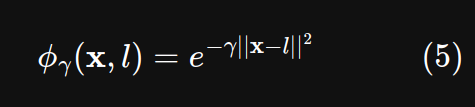

Usando as instâncias em 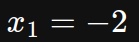 e 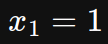 com 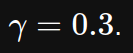

No caso limite, podemos usar todas as instâncias do dataset para ter certeza que os dados são linearmente separáveis.



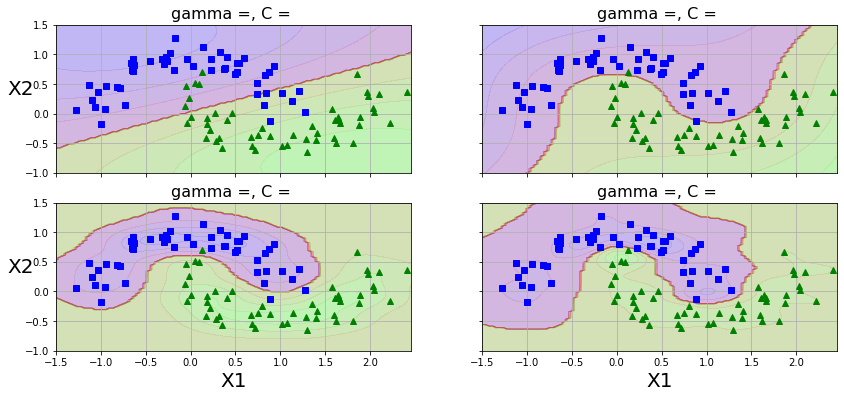

In [15]:
from sklearn.svm import SVC


gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000 # Parâmetro de Regularização que indica quantos erros vamos permitir
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)


svm_clfs = []

# Aqui treinamos 4 modelos
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 6), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"gamma =, C = ".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()
     

Existem outros kernels, porém não são muito comuns.

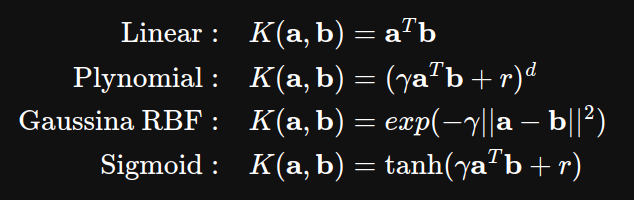

Para poder usar um kernel, este deve cumprir alguns requisitos. No caso de uma transformação polinomial de segundo grau:

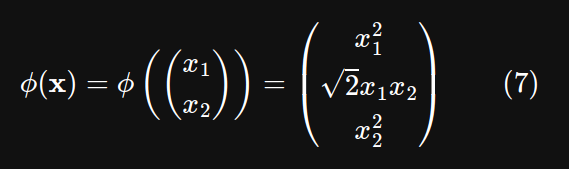

Se aplicamos a transformação a dois vetores e calculamos seu produto



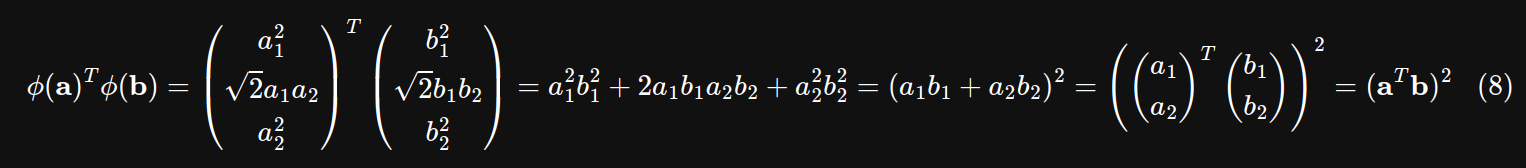

Como podemos ver, o produto de dois vetores transformados é igual ao produto dos vetores originais elevados ao quadrado, 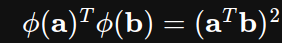 . Isto permite aplicar o kernel trick a todo o dataset sem a necessidade de calcular as transformações, o qual permite resolver o problema de maneira eficiente. Para que funcione, a transformação tem que ser um kernel, como as funções vistas anteriormente.



Finalmente, para obter predições

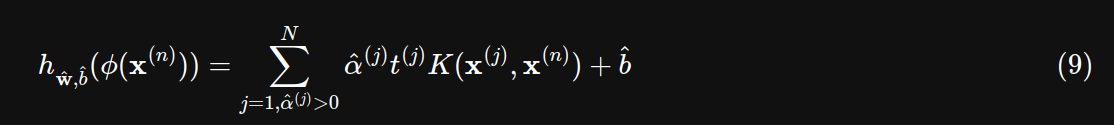

onde 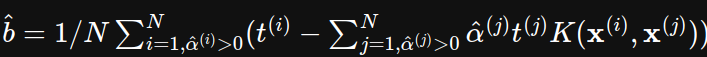 . Para poder fazer predições simplesmente temos que calcular o produto das novas instâncias com os vetores de suporte 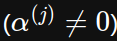.

#Regressão com SVM

Ademais de classificação, os algoritmos de SVMs, também permite resolver problemas de regressão. Para isso, simplesmente temos que inverter a função objetivo e invés de maximizar a margem entre vetores de suporte, tentaremos incluir tantas amostras como seja possível nele. Para isso, podemos usar o modelo LinearSVR de scikit-learn.

In [16]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [17]:
from sklearn.svm import LinearSVR # Biblioteca para Regressão Linear


svm_reg = LinearSVR(epsilon=1.5, random_state=42) # Esse parâmetro permite maximizar (epsilon grande) ou minimizar (epsilon pequeno) a MARGEM
svm_reg.fit(X, y)

# OBS: Antes o objetivo era MAXIMIZAR a margem... agora em REGRESSÃO LINEAR o objetivo é MINIMIZAR a margem, para poder ter a maior
# quantidade de Dados dentro desse Margem e assim poder aplicar regressão
     

LinearSVR(epsilon=1.5, random_state=42)

In [18]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])
     

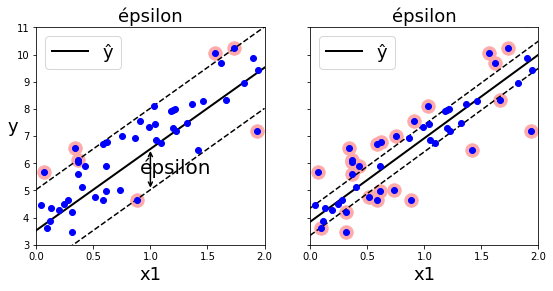

In [19]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"ŷ")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"x1", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"épsilon".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"y", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"épsilon", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"épsilon".format(svm_reg2.epsilon), fontsize=18)
plt.show()

Adicionar mais amostras dentro da margem NÃO AFETARÁ o resultado. Também podemos aplicar o kernel trick se temos Dados não lineares. Para isso podemos usar o modelo SVR.



In [20]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [21]:
from sklearn.svm import SVR # Biblioteca Súper Vector Regression

# Com essa biblioteca podemos usar kernel trick

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [22]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

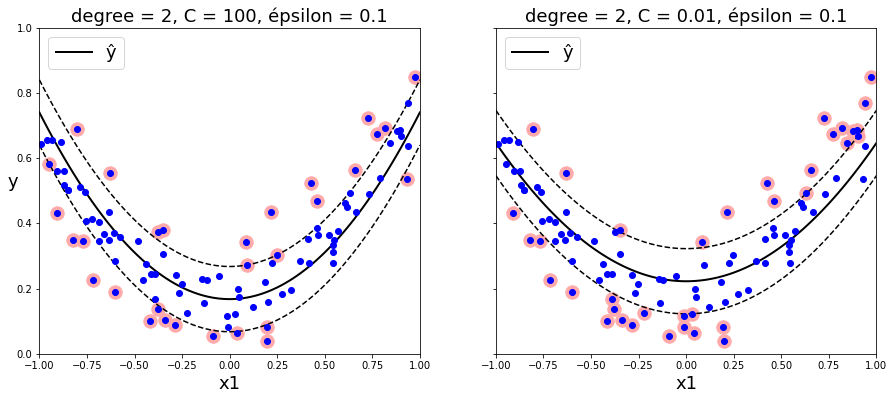

In [39]:
fig, axes = plt.subplots(ncols=2, figsize=(15,6), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 10])
plt.title(r"degree = 2, C = 100, épsilon = 0.1".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"y", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"degree = 2, C = 0.01, épsilon = 0.1".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()
     

Como já tinhamos comentado anteriormente (ou em outro scritp) a melhor combinação de hiperparâmetros teremos que achar usando técnicas de otimização de hiperparâmetros (grid search, random search, etc).

#Descenso por Gradiente

Como sabemos os algoritmos SVMs nos permite trabalhar com Dados não lineares (a qual é uma melhora com respeito aos modelos lineares), mas estes tem uma principal limitação ... de que precisam que todo o Dataset esteja carregado em memoria. Isto é possível no caso de trabalhar com Datasets pequenos (nos quais SVMs brilham e usualmente dão bons resultados) porém em caso contrário deveremos usar outras alternativas. Uma delas é o uso do ALGORITMO DE DESCENSO POR GRADIENTE para treinar uma SVM em modo batch. Vamos ver um exemplo de implementação usando o Dataset Iris.

In [41]:
# Pegar os dados

from sklearn import datasets
import numpy as np


iris = datasets.load_iris()


X = iris["data"][:, (2, 3)] # comprimento da pétala, largura da pétala
y = (iris["target"] == 2).astype(np.float64).reshape(-1, 1) # Iris virginica

In [42]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [43]:
from sklearn.svm import SVC #Classificador de Super Vetor
svm = SVC(C=100, kernel="linear")
svm.fit(X,y.ravel())

SVC(C=100, kernel='linear')

In [44]:
svm.intercept_[0], svm.coef_[0]

(-32.571107053522205, array([3.99824312, 7.9866377 ]))

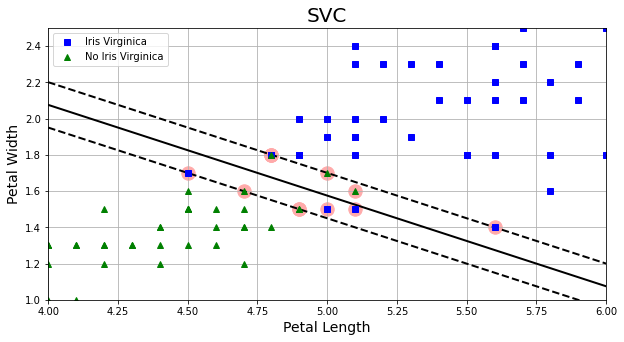

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plot_svc_decision_boundary(svm, 4, 6)
yr = y.ravel()
plt.plot(X[:,0][yr==1], X[:,1][yr==1], "bs", label='Iris Virginica')
plt.plot(X[:,0][yr==0], X[:,1][yr==0], "g^", label='No Iris Virginica')
plt.axis([4, 6, 1, 2.5])
plt.title("SVC", fontsize=20)
plt.legend()
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)
plt.grid()
plt.show()

Uma maneira de treinar uma SVM com descenso por gradiente é usar um SGDClassifier para minimizar a função de custo hinge.

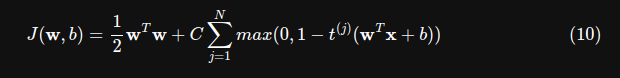

In [47]:
from sklearn.linear_model import SGDClassifier # Biblioteca Estocástico de Gradiente Descendente (SGD)
# usamos está biblioteca quando nosso Dataset é muito grande e não podamos carregar-lo em memoria

sgd = SGDClassifier(alpha=0.017)
sgd.fit(X, yr)

SGDClassifier(alpha=0.017)

In [50]:
t = 2*y-1
w = np.r_[sgd.intercept_[0], sgd.coef_[0]]
X_b = np.c_[np.ones((len(X), 1)), X]
X_b_t = X_b * t
support_vectors_idx = (X_b_t.dot(w) < 1).ravel() 
sgd.support_vectors_ = X[support_vectors_idx]

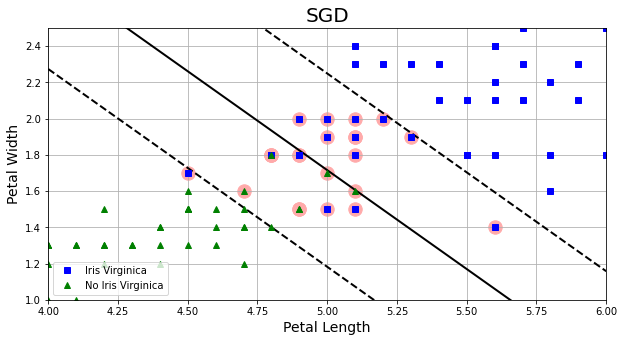

In [49]:
plt.figure(figsize=(10, 5))
plot_svc_decision_boundary(sgd, 4, 6)
yr = y.ravel()
plt.plot(X[:,0][yr==1], X[:,1][yr==1], "bs", label='Iris Virginica')
plt.plot(X[:,0][yr==0], X[:,1][yr==0], "g^", label='No Iris Virginica')
plt.axis([4, 6, 1, 2.5])
plt.title("SGD", fontsize=20)
plt.legend()
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)
plt.grid()
plt.show()

Alternativamente, podemos implementar nossa própria lógica de GD.

In [51]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self, C=1, eta=0.1, epochs=1000):
        self.C = C
        self.eta = eta
        self.epochs = epochs

    def fit(self, X, y):
        # PASOS
        # 1 - Inicializar pesos aleatorios
        # 2 - Loop de entrenamiento
        #   2.1 - Calcular vectores soporte
        #   2.2 - Calcular función de pérdida
        #   2.3 - Calcular gradiente de función de pérdida con respecto a los parámteros
        #   2.4 - Actualizar parámetros
        # 3 - Guardar resultados

        w = np.random.randn(2, 1)
        b = 0
        t = 2*y-1
        X_t = X*t

        for e in range(1, self.epochs+1):

          support_vectors_idx = (X_t.dot(w) + t*b < 1).ravel()
          X_t_sv = X_t[support_vectors_idx]
          t_sv = t[support_vectors_idx]

          grad_w = w - self.C*np.sum(X_t_sv, axis=0).reshape(-1, 1)
          grad_b = - self.C * np.sum(t_sv)
          
          w = w - self.eta * grad_w
          b = b - self.eta * grad_b

        self.coef_ = np.array([w])
        self.intercept_ = np.array([b])
        support_vectors_idx = (X_t.dot(w) + t*b < 1).ravel()
        self.support_vectors_ = X[support_vectors_idx]